In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
in_dir = Path('data/logs/step_log_2023-12-13_14-02.csv')

In [4]:
logs = [pd.read_csv('../../data/logs/step_log_2023-12-16_01-16.csv')]

In [5]:
# logs = []

# for f in in_dir.iterdir():
#     try:
#         this_log = pd.read_csv(f)
#     except:
#         print(f)

#     if '12-12_04-48' not in f.name:
#        continue

#     logs.append(this_log)

In [6]:
all_logs = pd.concat(logs)

In [7]:
all_logs.loc[all_logs['Cell Index'] == 740]

,Episode,Total Reward,Total Cost,Invalid Actions,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand


In [8]:
all_logs['Unmet Demand'].min()

23876375.0

In [9]:
all_logs = all_logs.reset_index()

In [10]:
all_logs['Unmet Demand'].argmin()

17653

In [11]:
all_logs['Epsilon'] = all_logs['Epsilon'].bfill()
all_logs['Episode'] = all_logs['Episode'].bfill()
all_logs['Total Reward'] = all_logs['Total Reward'].bfill()
all_logs['Total Cost'] = all_logs['Total Cost'].bfill()

In [12]:
all_logs = all_logs.sort_values(by=['Episode', 'index'], ascending=[True, True])
all_logs

,index,Episode,Total Reward,Total Cost,Invalid Actions,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand
0,0,1.0,77.935603,NaN,NaN,1.0,11358.0,wind,0.0,25872.0,57161627.0
1,1,1.0,77.935603,NaN,NaN,1.0,14025.0,solar,0.0,506287.0,56681212.0
2,2,1.0,77.935603,NaN,NaN,1.0,12947.0,wind,0.0,536007.0,56651492.0
3,3,1.0,77.935603,NaN,NaN,1.0,10533.0,wind,0.0,552922.0,56634577.0
4,4,1.0,77.935603,NaN,NaN,1.0,6343.0,solar,0.0,1038182.0,56149317.0
...,...,...,...,...,...,...,...,...,...,...,...
37189,37189,NaN,NaN,NaN,NaN,NaN,1953.0,wind,0.0,47986449.0,26880591.0
37190,37190,NaN,NaN,NaN,NaN,NaN,6021.0,wind,0.0,48053384.0,26831401.0
37191,37191,NaN,NaN,NaN,NaN,NaN,12331.0,wind,0.0,48123223.0,26788033.0
37192,37192,NaN,NaN,NaN,NaN,NaN,4547.0,wind,0.0,48140410.0,26773144.0


In [46]:
res = all_logs.groupby(by='Episode').agg({'Total Reward': 'max', 'Total Cost': 'min',
                                          'Unmet Demand': 'min', 
                                          'Invalid Actions': 'max',
                                         'Epsilon': 'first'})

In [47]:
res['rolling_mean_reward'] = res['Total Reward'].rolling(5).mean()
res['rolling_mean_invalid'] = res['Invalid Actions'].rolling(5).mean()
res['rolling_mean_cost'] = res['Total Cost'].rolling(5).mean()
res['rolling_mean_unmet'] = res['Unmet Demand'].rolling(5).mean()

In [48]:
res

,Total Reward,Total Cost,Unmet Demand,Invalid Actions,Epsilon,rolling_mean_reward,rolling_mean_invalid,rolling_mean_cost,rolling_mean_unmet
Episode,,,,,,,,,
1.0,77.935603,-1.875511e+06,26654172.0,13.0,1.000000,NaN,NaN,NaN,NaN
2.0,92.286066,-1.993230e+06,25605609.0,22.0,0.965000,NaN,NaN,NaN,NaN
3.0,90.777284,-1.998563e+06,25843997.0,37.0,0.931225,NaN,NaN,NaN,NaN
4.0,85.560290,-1.971141e+06,25896173.0,30.0,0.898632,NaN,NaN,NaN,NaN
5.0,80.805070,-1.918973e+06,26418743.0,37.0,0.867180,85.472863,27.8,-1.951483e+06,26083738.8
...,...,...,...,...,...,...,...,...,...
90.0,104.480977,-2.122950e+06,24345698.0,42.0,0.041969,91.098699,112.2,-1.993362e+06,25489099.4
91.0,91.965421,-2.049507e+06,25658111.0,95.0,0.040500,90.925665,101.4,-2.007329e+06,25581462.8
92.0,96.692238,-2.085127e+06,25163144.0,65.0,0.039083,94.464918,82.6,-2.044316e+06,25348575.8


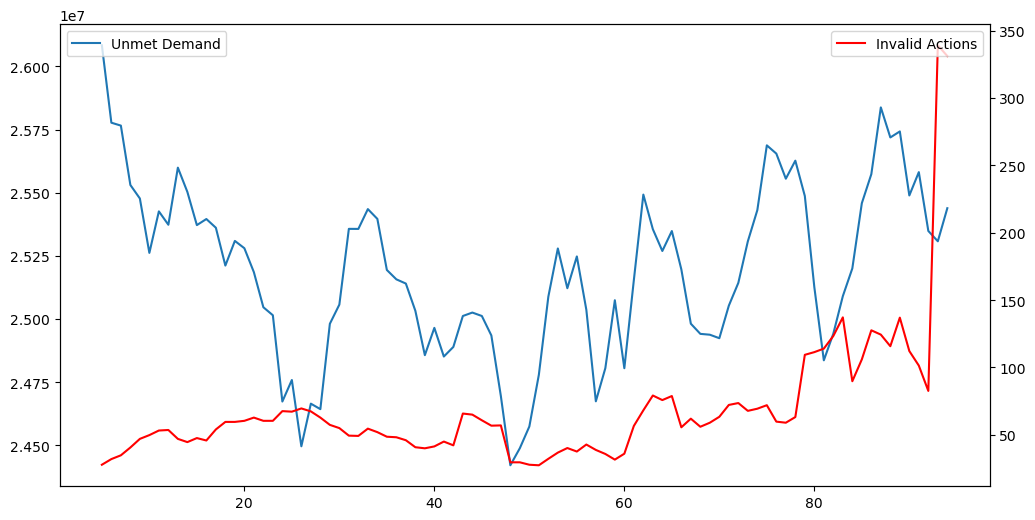

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

#ax.plot(res['Total Reward'], label='reward', alpha=0.7, linewidth=1.5,)
ax.plot(res['rolling_mean_unmet'], label='Unmet Demand', linewidth=1.5, color='C0')
#ax2.plot(res['Unmet Demand'], color='red', label='unmet demand', alpha=0.7, linewidth=1.5)
ax2.plot(res['rolling_mean_invalid'], label='Invalid Actions', linewidth=1.5, color='red')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

In [17]:
res.index.values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
       92., 93., 94.])

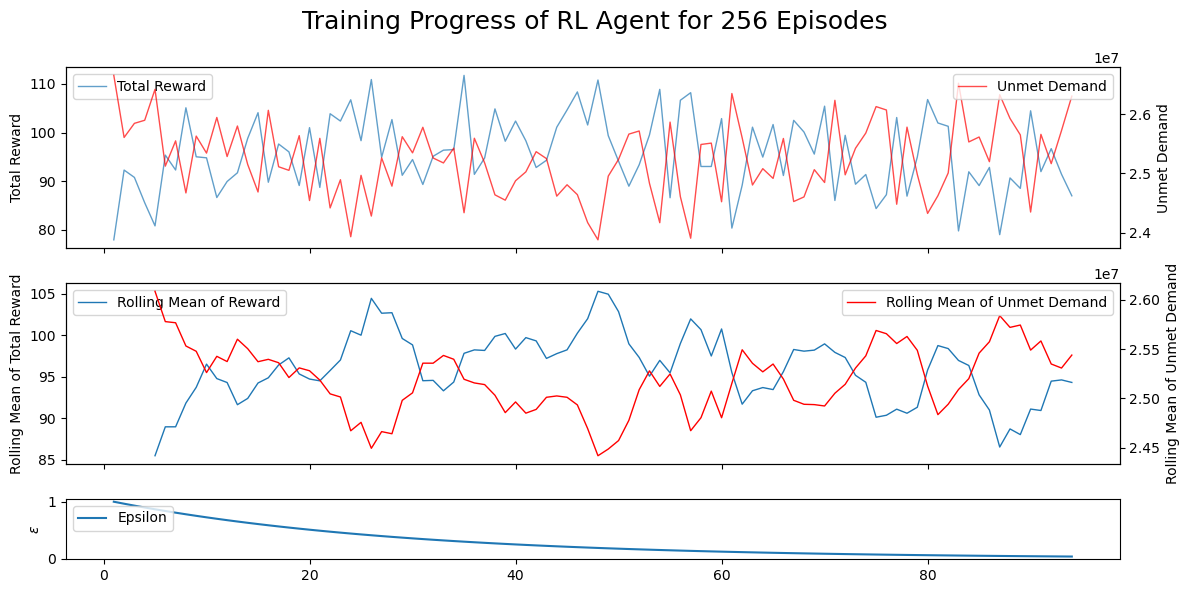

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 6), gridspec_kw={'height_ratios': [3, 3, 1]}, sharex=True)

ax_flat = ax.flatten()

ax0_0 = ax_flat[0]
ax0_1 = ax0_0.twinx()
ax1_0 = ax_flat[1]
ax1_1 = ax1_0.twinx()
ax2_0 = ax_flat[2]

ax0_0.plot(res.index.values, res['Total Reward'], label='Total Reward', alpha=0.7, linewidth=1)
ax0_1.plot(res.index.values, res['Unmet Demand'], color='red', label='Unmet Demand', alpha=0.7, linewidth=1)
ax0_0.set_ylabel('Total Reward')
ax0_1.set_ylabel('Unmet Demand')
ax0_0.legend(loc='upper left')
ax0_1.legend(loc='upper right')

ax1_0.plot(res.index.values, res['rolling_mean_reward'], linewidth=1, label='Rolling Mean of Reward')
ax1_1.plot(res.index.values, res['rolling_mean_unmet'], linewidth=1, color='red', label='Rolling Mean of Unmet Demand')
ax1_0.set_ylabel('Rolling Mean of Total Reward')
ax1_1.set_ylabel('Rolling Mean of Unmet Demand')
ax1_0.legend(loc='upper left')
ax1_1.legend(loc='upper right')

ax2_0.plot(res.index.values, res['Epsilon'], label='Epsilon')
ax2_0.set_ylabel('$\epsilon$')
ax2_0.legend(loc='upper left')

plt.suptitle('Training Progress of RL Agent for 256 Episodes', size=18)
plt.tight_layout()
plt.savefig('../../figures/final_model_training_logs.png', dpi=300)

In [19]:
# %matplotlib inline



# plt.scatter(best_unmet, rewards)

In [20]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 2).sum()

3698

In [21]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 1).sum()

24919

In [22]:
all_logs.groupby(by='Cell Index').size().quantile(0.95)

48.0

In [23]:
choice_groups = all_logs.groupby(by='Cell Index').agg({'index': 'count', 'Reward': 'mean'})
choice_groups = choice_groups.rename(columns={'index': 'n_times_chosen', 'Reward': 'mean_reward'})
choice_groups

,n_times_chosen,mean_reward
Cell Index,,
1556.0,18,0.000000
1557.0,34,-0.705882
1558.0,1,0.000000
1653.0,9,0.000000
1655.0,8,0.000000
...,...,...
18247.0,19,-0.105263
18248.0,3,0.000000
18249.0,6,0.000000


In [24]:
all_logs['Episode'].max()

94.0

In [25]:
choice_groups.groupby(by='n_times_chosen')['mean_reward'].mean()

n_times_chosen
1      0.000000
2     -0.070312
3     -0.109890
4     -0.113208
5     -0.106818
         ...   
112   -0.776786
115   -0.817391
123   -0.959350
135   -0.844444
148   -0.945946
Name: mean_reward, Length: 110, dtype: float64

In [26]:
choice_groups.loc[choice_groups['n_times_chosen'] == 29]

,n_times_chosen,mean_reward
Cell Index,,
2662.0,29,-0.275862
3622.0,29,-0.275862
3941.0,29,-0.137931
4026.0,29,-0.206897
4444.0,29,-1.103448
4445.0,29,-0.413793
4650.0,29,-0.344828
4831.0,29,-0.827586
4835.0,29,-0.344828


In [27]:
all_logs.loc[all_logs['Cell Index'] == 1859].sort_values(by='Episode')

,index,Episode,Total Reward,Total Cost,Invalid Actions,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand


In [28]:
choice_groups.loc[choice_groups['n_times_chosen'] == 12]

,n_times_chosen,mean_reward
Cell Index,,
1958.0,12,0.000000
2053.0,12,-0.500000
2766.0,12,-0.333333
2853.0,12,0.000000
3142.0,12,-0.333333
...,...,...
16059.0,12,-0.333333
16133.0,12,0.000000
16232.0,12,-0.166667


In [29]:
action_type_agg_count = all_logs.groupby(by=['Episode', 'Action Type']).size()
action_type_agg_count.name = 'count'
action_type_agg_count = action_type_agg_count.reset_index()

unmet_demand = all_logs.groupby(by='Episode').agg({'Unmet Demand': 'min'})
total_reward = all_logs.groupby(by='Episode').agg({'Total Reward': 'last'})

action_type_agg_count = action_type_agg_count.merge(unmet_demand, on='Episode', how='left')
action_type_agg_count = action_type_agg_count.merge(total_reward, on='Episode', how='left')

Text(0, 0.5, 'Unmet Demand at End of Episode')

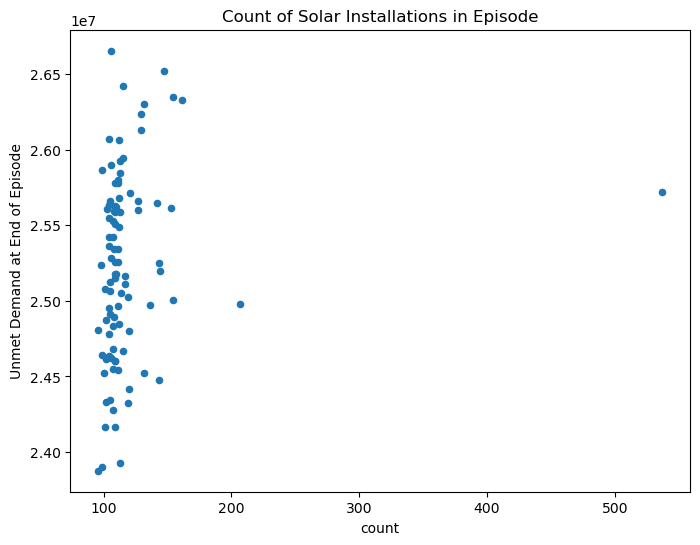

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Unmet Demand', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Unmet Demand at End of Episode')

Text(0, 0.5, 'Total Reward at End of Episode')

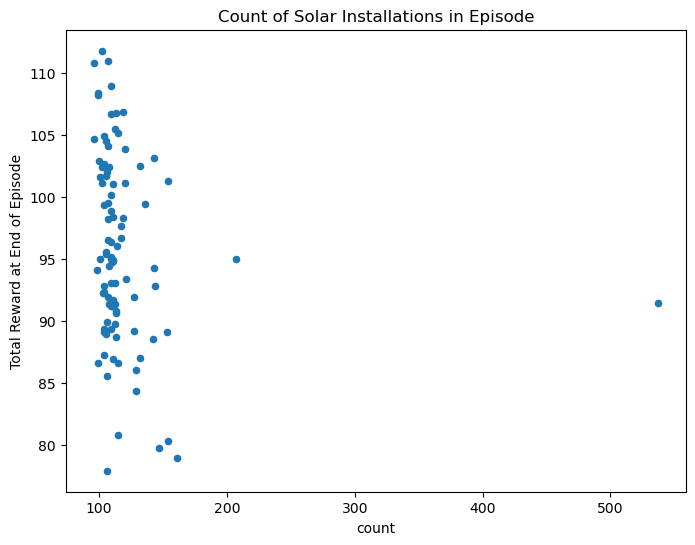

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Total Reward', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Total Reward at End of Episode')

In [32]:
action_type_agg_count.sort_values(by='Unmet Demand')

,Episode,Action Type,count,Unmet Demand,Total Reward
94,48.0,solar,96,23876375.0,110.812102
95,48.0,wind,278,23876375.0,110.812102
113,57.0,wind,284,23903522.0,108.209232
112,57.0,solar,99,23903522.0,108.209232
47,24.0,wind,317,23928499.0,106.745640
...,...,...,...,...,...
8,5.0,solar,115,26418743.0,80.805070
164,83.0,solar,147,26521841.0,79.768337
165,83.0,wind,244,26521841.0,79.768337
1,1.0,wind,174,26654172.0,77.935603


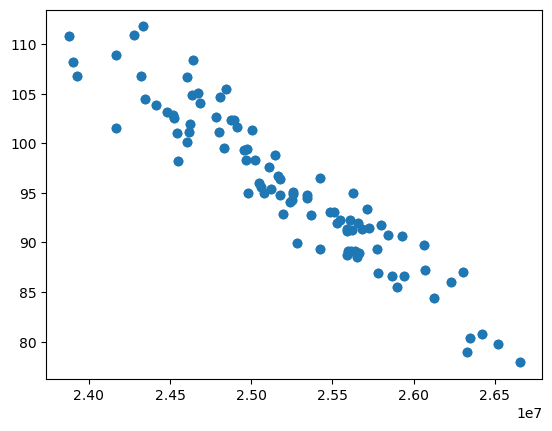

In [44]:
plt.scatter(action_type_agg_count['Unmet Demand'], action_type_agg_count['Total Reward'])
#plt.ylim([0,100])
plt.show()

In [34]:
action_type_agg_count.sort_values(by='Episode')

,Episode,Action Type,count,Unmet Demand,Total Reward
0,1.0,solar,106,26654172.0,77.935603
1,1.0,wind,174,26654172.0,77.935603
2,2.0,solar,103,25605609.0,92.286066
3,2.0,wind,219,25605609.0,92.286066
5,3.0,wind,222,25843997.0,90.777284
...,...,...,...,...,...
183,92.0,wind,268,25163144.0,96.692238
185,93.0,wind,1120,25722366.0,91.423886
184,93.0,solar,537,25722366.0,91.423886
187,94.0,wind,261,26303929.0,86.991807
